In [1]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('imdb_labelled.txt', delimiter = '\t', engine='python', quoting = 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Status  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.sample()

,Review,Status
996,"Unfortunately, any virtue in this film's produ...",0


In [5]:
X = df['Review']
y = df['Status']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size = 0.20)

In [7]:
vocab_size = 1000
oov_token = "<OOV>"
max_length = 100
padding_type = "post"
trunction_type='post'

In [8]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index


In [9]:
# word_index

In [10]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunction_type)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=trunction_type)

In [11]:
X_train_sequences[10:15]

[[609,
  24,
  74,
  279,
  610,
  611,
  612,
  34,
  20,
  1,
  5,
  280,
  195,
  3,
  147,
  429,
  2,
  15,
  430,
  243,
  244,
  16,
  1,
  167,
  18,
  83,
  12,
  4,
  431,
  1,
  1,
  11,
  1],
 [3, 46, 281, 1, 196, 2, 333, 95, 20, 613],
 [1,
  1,
  6,
  4,
  31,
  1,
  1,
  614,
  59,
  72,
  28,
  31,
  1,
  33,
  334,
  3,
  335,
  168,
  30,
  432,
  40,
  4,
  1,
  336,
  18,
  1,
  11,
  79,
  1,
  16,
  1,
  3,
  615],
 [616, 1, 77, 6, 31, 337, 3, 168, 51, 61, 10, 148, 4, 1, 1, 3, 24, 191, 118],
 [2, 15, 1, 617, 45, 433, 73, 5, 35, 618, 1, 245]]

In [12]:
X_train_padded

array([[  8, 106,   1, ...,   0,   0,   0],
       [ 34,  20,   2, ...,   0,   0,   0],
       [  9,   6,  30, ...,   0,   0,   0],
       ...,
       [118,  42,   7, ...,   0,   0,   0],
       [ 76,  26,   4, ...,   0,   0,   0],
       [397, 148,   7, ...,   0,   0,   0]], dtype=int32)

In [13]:
X_test_sequences[0]

[2, 957, 1, 1, 1, 184, 46, 1, 73, 29, 1, 20, 1, 3, 77, 563, 1]

In [14]:
X_test_padded

array([[  2, 957,   1, ...,   0,   0,   0],
       [ 49,   6,  21, ...,   0,   0,   0],
       [  8, 176,   7, ...,   0,   0,   0],
       ...,
       [ 18,   8, 154, ...,   0,   0,   0],
       [ 19,  80, 161, ...,   0,   0,   0],
       [  7,   6, 395, ...,   0,   0,   0]], dtype=int32)

In [16]:
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 80570 word vectors.


In [17]:
embeddings_index['attention']

array([-3.3414e-01,  4.6667e-01,  5.3744e-01,  5.7743e-02,  2.9642e-01,
        2.5224e-01, -6.5586e-01, -4.1668e-01,  2.1959e-01, -4.9413e-01,
       -2.1816e-01, -9.0227e-02, -3.5179e-02, -2.7279e-01, -1.2343e-01,
        1.6808e-01, -5.0623e-01, -4.0497e-01, -1.6763e-01,  4.9066e-01,
       -8.8020e-02, -1.2339e-01, -3.8436e-01, -2.7766e-01, -1.3403e-01,
        1.4342e-01, -2.9177e-01, -2.1146e-02,  5.2180e-01, -2.1213e-01,
        3.0860e-02,  1.0402e-01, -1.6807e-01,  4.6170e-01, -5.4806e-01,
       -6.6849e-02, -3.3180e-01,  3.7257e-01, -7.4962e-01,  6.2741e-01,
       -4.9500e-01, -4.0996e-01, -1.4686e-01, -2.7166e-01, -7.7093e-02,
       -2.8342e-01,  6.3663e-02, -1.5734e-01,  6.9649e-01, -9.6694e-01,
        4.4510e-01, -2.4521e-01, -4.8447e-01,  1.1957e+00,  2.9929e-02,
       -2.0425e+00, -2.8603e-01, -3.9043e-01,  1.2197e+00, -4.7760e-01,
       -2.1191e-02,  9.3080e-01, -1.8173e-01, -7.5721e-02,  1.1242e+00,
       -8.2276e-02,  5.7149e-02, -2.3585e-01,  3.5901e-01,  6.92

In [18]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [19]:
embedding_matrix[20]

array([-0.51533002,  0.83186001,  0.22457001, -0.73865002,  0.18718   ,
        0.26021001, -0.42563999,  0.67120999, -0.31084001, -0.61274999,
        0.089526  , -0.24011   ,  1.18780005,  0.67609   , -0.022885  ,
       -0.92532998,  0.071174  ,  0.38837001, -0.42923999,  0.37143999,
        0.32670999,  0.43141001,  0.87494999,  0.34009001, -0.23188999,
       -0.41144001,  0.49061   , -0.32905999, -0.49109   , -0.18988   ,
        0.33408001, -0.21245   , -0.38385999, -0.080547  ,  1.11609995,
        0.23616999,  0.31332999,  0.49285999,  0.1       , -0.15131   ,
       -0.14176001, -0.2802    , -0.2388    , -0.35486001,  0.18282001,
       -0.19134   ,  0.60544002,  0.074573  , -0.20731001, -0.60965002,
        0.19908001, -0.57024002, -0.17427   ,  1.44190001, -0.25018999,
       -1.86479998,  0.41670999, -0.24607   ,  1.50100005,  0.87414998,
       -0.67135   ,  1.27620006, -0.2721    ,  0.17583001,  1.22420001,
        0.28242001,  0.62374997,  0.63950998,  0.36914   , -0.84

In [20]:
embedding_layer = Embedding(len(word_index) + 1,
                            max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

In [21]:
embedding_dim = 16
input_length = 100

In [22]:
model = Sequential([
    embedding_layer,
  Bidirectional(LSTM(embedding_dim, return_sequences=True)),
  Bidirectional(LSTM(embedding_dim,)),
  Dense(6, activation='relu'),
  Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          273100    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 32)           14976     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 294,553
Trainable params: 21,453
Non-trainable params: 273,100
_________________________________________________________________


In [23]:
num_epochs = 7
from keras.callbacks import EarlyStopping
# callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history = model.fit(X_train_padded, y_train, epochs=num_epochs, validation_data=(X_test_padded, y_test))

Epoch 1/7
25/25 [==============================] - 4s 159ms/step - loss: 0.6873 - accuracy: 0.5475 - val_loss: 0.6814 - val_accuracy: 0.5950
Epoch 2/7
25/25 [==============================] - 2s 98ms/step - loss: 0.6642 - accuracy: 0.6325 - val_loss: 0.6618 - val_accuracy: 0.6600
Epoch 3/7
25/25 [==============================] - 2s 98ms/step - loss: 0.6311 - accuracy: 0.6662 - val_loss: 0.6344 - val_accuracy: 0.6550
Epoch 4/7
25/25 [==============================] - 2s 98ms/step - loss: 0.5681 - accuracy: 0.7275 - val_loss: 0.5480 - val_accuracy: 0.7250
Epoch 5/7
25/25 [==============================] - 2s 98ms/step - loss: 0.5459 - accuracy: 0.7212 - val_loss: 0.5161 - val_accuracy: 0.7450
Epoch 6/7
25/25 [==============================] - 2s 99ms/step - loss: 0.4922 - accuracy: 0.7812 - val_loss: 0.4973 - val_accuracy: 0.8050
Epoch 7/7
25/25 [==============================] - 2s 95ms/step - loss: 0.4511 - accuracy: 0.7987 - val_loss: 0.4510 - val_accuracy: 0.7950


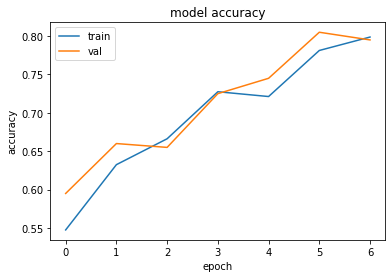

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

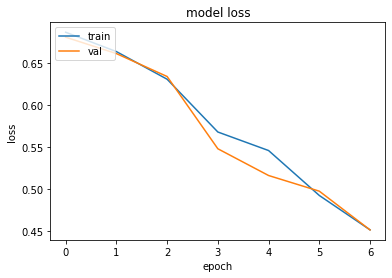

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()